# Ecosistema científico en python


- **Numpy:** crear y manipular datos numéricos
- **Matplotlib:** visualización de datos (mayormente 2d)
- **SciPy:** conjunto de herramientas comunmente utilizadas, procesamiento imágenes, estadísticas, etc
- **Pandas:** python data analysis library https://pandas.pydata.org/
- **Plotly:** Plotly Python Open Source Graphing Library https://plotly.com/python/

## Importar módulos

In [2]:
import numpy as np
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

**En los notebooks necesitamos el siguiente comodín para que los plots se muestren a la salida de una celda**

In [1]:
%matplotlib inline

## Gráficos 1d

In [3]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)

In [7]:
x.dot(y)

184.73684210526312

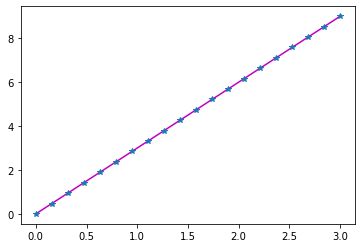

In [10]:
plt.plot(x, y,'m')       # line plot    
plt.plot(x, y, '*')  # dot plot   

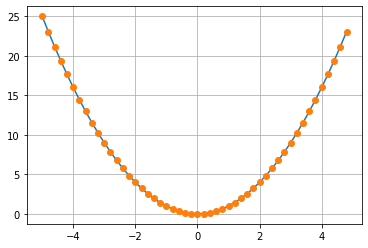

In [11]:
dx = 0.2
x2 = np.arange(-5,5,dx)
y2 = x2**2

plt.plot(x2, y2)       # line plot    
plt.plot(x2, y2, 'o')  # dot plot   
plt.grid()

In [12]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
   

**Veamos otro ejemplo**

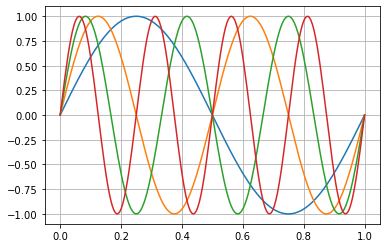

In [15]:
t = np.linspace(0,1,200)

for freq in range(1,5):
    f = np.sin(2 * np.pi * t * freq)
    plt.plot(t,f)
plt.grid()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Arreglos 2d (matrices)

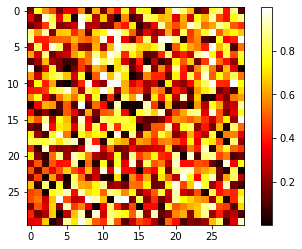

In [16]:
image = np.random.rand(30, 30)

plt.imshow(image, cmap=plt.cm.hot)

plt.colorbar();

## Pandas: Python for Data Analisys


In [17]:
import pandas as pd

In [30]:
cumples = pd.read_csv("data/queloscumplas.txt", sep=" ", header=None, names=['fecha', 'hora'])

In [31]:
cumples.tail()

fecha      hora
995  2003-09-24  13:24:06
996  1994-05-26  05:39:46
997  2002-12-25  08:20:12
998  2007-06-26  09:16:30
999  1997-03-19  05:42:08

In [24]:
cumples.columns = ['fecha', 'hora']

In [27]:
cumples['hora']

0      03:41:17
1      18:55:45
2      13:34:07
3      13:52:53
4      07:47:11
         ...   
995    13:24:06
996    05:39:46
997    08:20:12
998    09:16:30
999    05:42:08
Name: hora, Length: 1000, dtype: object

In [36]:
cumples['hora'][0:10]

0    03:41:17
1    18:55:45
2    13:34:07
3    13:52:53
4    07:47:11
5    00:19:55
6    08:15:07
7    03:56:29
8    03:30:59
9    05:53:02
Name: hora, dtype: object

## Trabajemos con otro set de datos

In [37]:
drone = pd.read_csv("data/gps.CSV", sep=";")

In [42]:
drone.describe()

dist          lat          lng       altgps         velo  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean    112.999200   -31.639448   -60.674513    20.499200     3.947916   
std      82.997878     0.000345     0.001316     9.728025     0.936509   
min       1.000000   -31.639940   -60.675922     9.800000     0.074000   
25%     102.000000   -31.639751   -60.675662    13.900000     3.560500   
50%     111.000000   -31.639545   -60.675007    15.400000     4.074000   
75%     116.000000   -31.639120   -60.673431    26.975000     4.556000   
max    1770.000000   -31.638796   -60.671764    47.000000     7.760000   

             altbar    pAtm  
count  1.250000e+03  1250.0  
mean  -1.317640e+03  1193.0  
std    2.979787e-11     0.0  
min   -1.317640e+03  1193.0  
25%   -1.317640e+03  1193.0  
50%   -1.317640e+03  1193.0  
75%   -1.317640e+03  1193.0  
max   -1.317640e+03  1193.0

<AxesSubplot:>

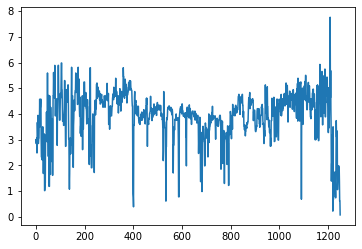

In [43]:
drone["velo"].plot()

In [44]:
drone.head()

dist                 timegps        lat        lng  altgps   velo   altbar  \
0    99  2019-09-05 16:04:27.00 -31.639461 -60.672073    44.1  3.000 -1317.64   
1    96  2019-09-05 16:04:28.00 -31.639463 -60.672081    44.1  2.852 -1317.64   
2    77  2019-09-05 16:04:28.00 -31.639463 -60.672081    44.1  2.852 -1317.64   
3    94  2019-09-05 16:04:28.00 -31.639463 -60.672081    44.1  2.852 -1317.64   
4   114  2019-09-05 16:04:30.00 -31.639456 -60.672062    42.3  3.074 -1317.64   

     pAtm  
0  1193.0  
1  1193.0  
2  1193.0  
3  1193.0  
4  1193.0

- Queremos filtrar solamente el conjunto de datos donde la velocidad sea entre 2.5 y 3

In [50]:
ind = (drone['velo']>2.5) & (drone['velo']<3) & (drone['altgps']>41)

In [51]:
drone[ind]

dist                 timegps        lat        lng  altgps   velo  \
1      96  2019-09-05 16:04:28.00 -31.639463 -60.672081    44.1  2.852   
2      77  2019-09-05 16:04:28.00 -31.639463 -60.672081    44.1  2.852   
3      94  2019-09-05 16:04:28.00 -31.639463 -60.672081    44.1  2.852   
10    102  2019-09-05 16:04:35.00 -31.639444 -60.672119    41.4  2.852   
11     70  2019-09-05 16:04:35.00 -31.639444 -60.672119    41.7  2.852   
192   101  2019-09-05 16:06:55.00 -31.639729 -60.674114    44.3  2.611   

      altbar    pAtm  
1   -1317.64  1193.0  
2   -1317.64  1193.0  
3   -1317.64  1193.0  
10  -1317.64  1193.0  
11  -1317.64  1193.0  
192 -1317.64  1193.0

# Usemos otros paquetes de visualización

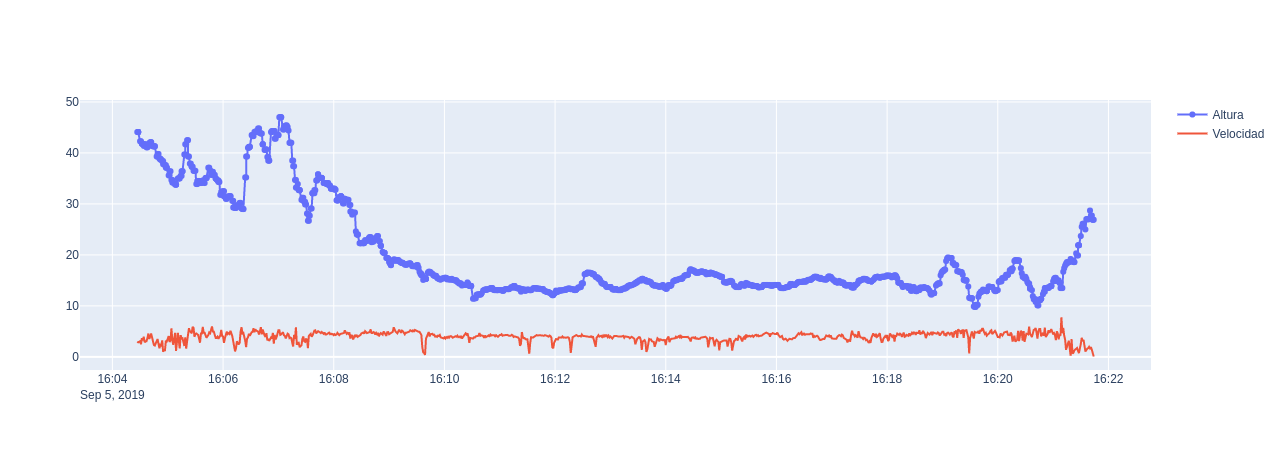

In [58]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=drone['timegps'], y=drone['altgps'], mode='lines+markers', name='Altura'))
fig.add_trace(go.Scatter(x=drone['timegps'], y=drone['velo'], name='Velocidad'))

fig.show()

## Veamos por donde caminé

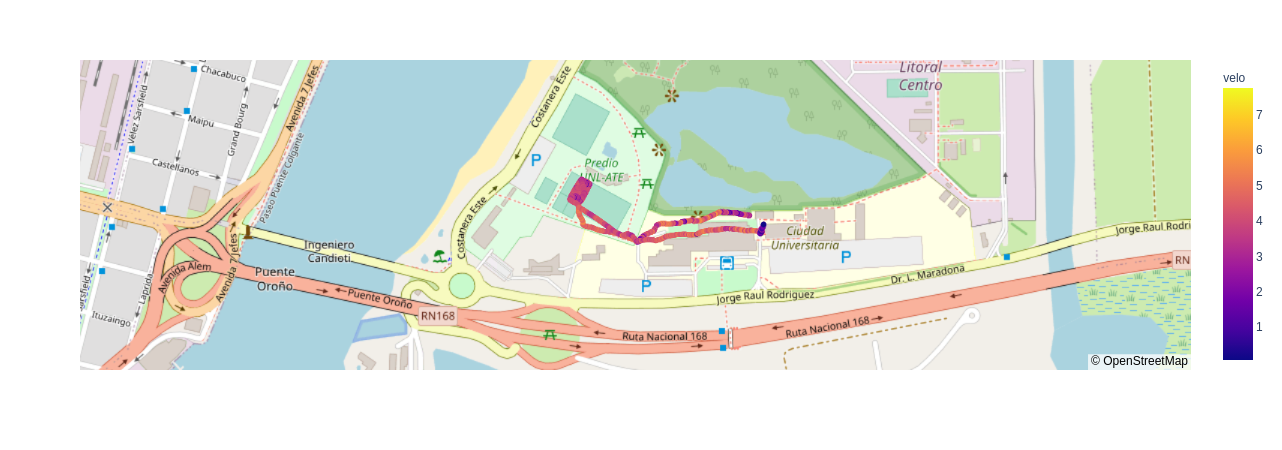

In [63]:
import plotly.express as px

fig = px.scatter_mapbox(drone, lat="lat", lon="lng", hover_name="altgps", hover_data=["timegps", "pAtm", "altbar"], zoom=15, color='velo')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [60]:
drone.head()

dist                 timegps        lat        lng  altgps   velo   altbar  \
0    99  2019-09-05 16:04:27.00 -31.639461 -60.672073    44.1  3.000 -1317.64   
1    96  2019-09-05 16:04:28.00 -31.639463 -60.672081    44.1  2.852 -1317.64   
2    77  2019-09-05 16:04:28.00 -31.639463 -60.672081    44.1  2.852 -1317.64   
3    94  2019-09-05 16:04:28.00 -31.639463 -60.672081    44.1  2.852 -1317.64   
4   114  2019-09-05 16:04:30.00 -31.639456 -60.672062    42.3  3.074 -1317.64   

     pAtm  
0  1193.0  
1  1193.0  
2  1193.0  
3  1193.0  
4  1193.0